# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [51]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [53]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [54]:
X = np.concatenate((x_train,x_test))
y = np.concatenate((t_train,t_test))

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [55]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [56]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [57]:
y = y.reshape(70000,1)

In [58]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [60]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


<Figure size 640x480 with 0 Axes>

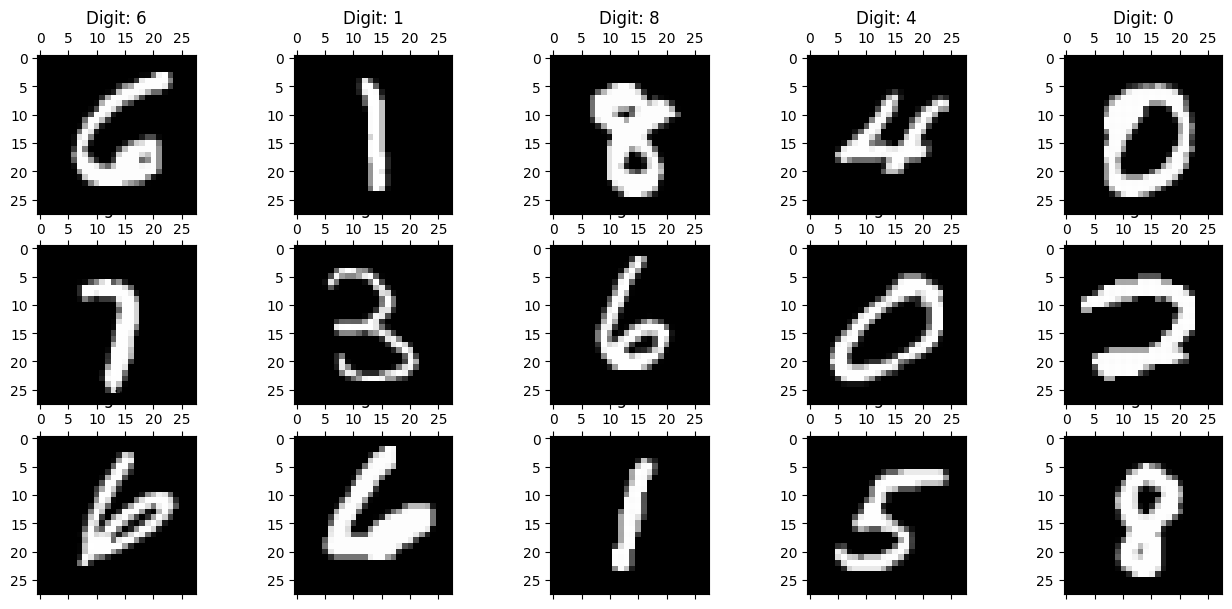

In [61]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [62]:
### 정규화작업
scaled_X = X / 255.0 

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state=42)



### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [64]:
from sklearn.decomposition import PCA


In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### Elbow point method :  곡선의기울기가급격히감소하는지점 (Elbow Point)에서 선택)

In [66]:
pca = PCA(n_components=X.shape[1], copy=False)
pca_x = pca.fit_transform(X_train)
pca_x

array([[ 4.92032377e-01, -2.15353895e+00, -7.22444671e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.52504901e-01,  2.59776603e+00,  2.48252046e+00, ...,
        -1.25921139e-15, -1.04473081e-16, -8.97606353e-17],
       [-7.96027788e-01,  7.21512862e-01, -2.37459272e+00, ...,
         9.62512193e-16, -9.51648074e-16,  2.52993976e-17],
       ...,
       [-3.83443347e+00, -1.45287698e+00,  7.73954777e-02, ...,
         6.05208124e-18,  1.80582743e-20,  5.63939034e-20],
       [ 4.80284806e+00, -1.56210442e+00,  3.05639264e+00, ...,
         7.17685855e-18, -1.14414803e-18, -1.27074062e-19],
       [ 3.12588484e+00, -4.13093294e+00,  3.22660913e+00, ...,
         1.26899971e-17,  9.52769957e-19, -1.60635136e-18]])

In [67]:
# explained_variance_ 를 사용해서 고유값을 확인할 수 있다.
exv = pca.explained_variance_
exv.shape

(784,)

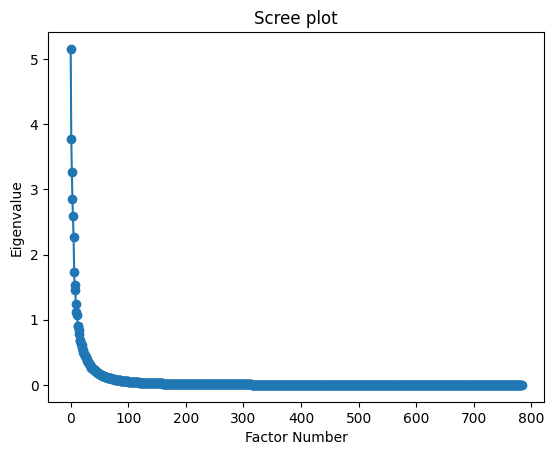

In [68]:
plt.title("Scree plot")
plt.plot(np.arange(exv.shape[0]), exv, marker='o')
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

##factor number 30이전을 그래프로 다시 확인

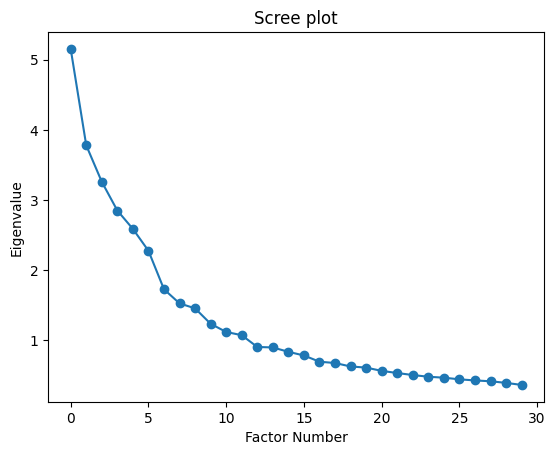

In [69]:
plt.title("Scree plot")
plt.plot(np.arange(exv[:30].shape[0]), exv[:30], marker='o') # 80개만 표시
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

## elbow point 12로 책정

##누적설명률 70-80인 지점 확인(26개-43개)

In [70]:
pca = PCA(n_components=0.7, copy=False) # 70% 지점
pca_x = pca.fit_transform(X_train)
exv = pca.explained_variance_
exv.shape

(26,)

In [71]:
pca = PCA(n_components=0.8, copy=False) # 80% 지점
pca_x = pca.fit_transform(X_train)
exv = pca.explained_variance_
exv.shape

(43,)

## LDA 사용예시

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_X = clf.fit_transform(X_train,y_train.reshape(-1))
LDA_X.shape

(56000, 9)

In [73]:
clf.explained_variance_ratio_ ## 9개로 축소

array([0.23801142, 0.20214164, 0.17770134, 0.10681218, 0.09457475,
       0.06940949, 0.0497301 , 0.03443888, 0.02718019])

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)  LogisticRegression,SVC,RandomForestClassifier 활용

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

In [75]:
lr = LogisticRegression(max_iter=1000,random_state=42) # warnings 방지
svc = SVC(random_state = 42,max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# 모두 기본 파라미터로 학습

models = [lr, svc, rf]

In [ ]:
# 모든 모델 학습 후 ACC 측정 시간
start = time.time()

for model in models:
    model.fit(X_train, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(X_test))}")

end = time.time()

print("경과시간", end - start)

model: LogisticRegression(), accuracy_score: 0.595


C:\Users\dkdld\anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# pca 변환 
pca = PCA(n_components=0.80, copy=False)
PCA_x = pca.fit_transform(X_train)
PCA_test_X = pca.transform(X_test)
# LDA 변환
clf = LinearDiscriminantAnalysis()
LDA_X = clf.fit_transform(X_train,y_train.reshape(-1)) 
LDA_test_X = clf.transform(X_test)

In [ ]:
# PCA 변환 한 데이터 시간 측정
start = time.time()

for model in models:
    model.fit(PCA_x, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(PCA_test_X))}")

end = time.time()

print("경과시간", end - start)

In [ ]:
# LDA 변환 한 데이터 시간 측정
start = time.time()

for model in models:
    model.fit(LDA_X, y_train.reshape(-1))
    print(f"model: {model.__class__()}, accuracy_score: {accuracy_score(y_test, model.predict(LDA_test_X))}")

end = time.time()

print("경과시간", end - start)

특정한 틀 없이 자유롭게 해주시면 됩니다!